<a href="https://colab.research.google.com/github/BrotherKim/Colab/blob/main/SEP531/Wk3_P2_Web_Crawler_2%2B3_news%2Bwiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [SEP 531] 정보검색 실습: Web Crawler 2 - News; Web Crawler 3 - Wikipedia

Primary TA: 임채균

TA's E-mail: rayote@kaist.ac.kr

본 실습에서는 웹문서 크롤링 구현을 위해서 실제적으로 뉴스를 수집하거나, 위키피디아 문서를 파싱하는 방법을 다룹니다. 


## Contents

1. 뉴스 문서
  * 뉴스 페이지별 문서구조 파악 (네이버 뉴스)
  * [Python] 뉴스 문서 크롤링

2. 위키피디아 문서
  * 위키피디아 문서구조 파악
  * [Python] 위키피디아 크롤링


# Part 1: 뉴스 문서 (네이버 뉴스)


## (1) 뉴스 페이지별 문서구조 파악 (네이버 뉴스)

**예제: 네이버 뉴스**  https://news.naver.com/

* 뉴스 분야별 URL 비교
  * 경제 뉴스: https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=101
  * IT/과학 뉴스: https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=105
  * GET방식 주소의 파라미터 `sid1`로 구분되고 있음 (경제= 101, IT/과학= 105)

* 세부분야별 URL 비교 (IT/과학 세부분야)
  * 모바일: https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=105&sid2=731
  * 인터넷/SNS: https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=105&sid2=226
  * IT 일반: https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=105&sid2=230
  * 파라미터 `sid2`로 구분되고 있음 (모바일= 731, 인터넷/SNS, 226, IT 일반= 230)

* 특정 날짜, 페이지번호 포함된 전체 URL 확인
  * https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid2=230&sid1=105&date=20200915&page=4
  * `sid1`= IT/과학, `sid2`= IT 일반, `date`= 2020년 9월 15일, `page`= 4
  * 뉴스 크롤러 구현 시, 위와 같은 주소 조합을 순차탐색 가능함


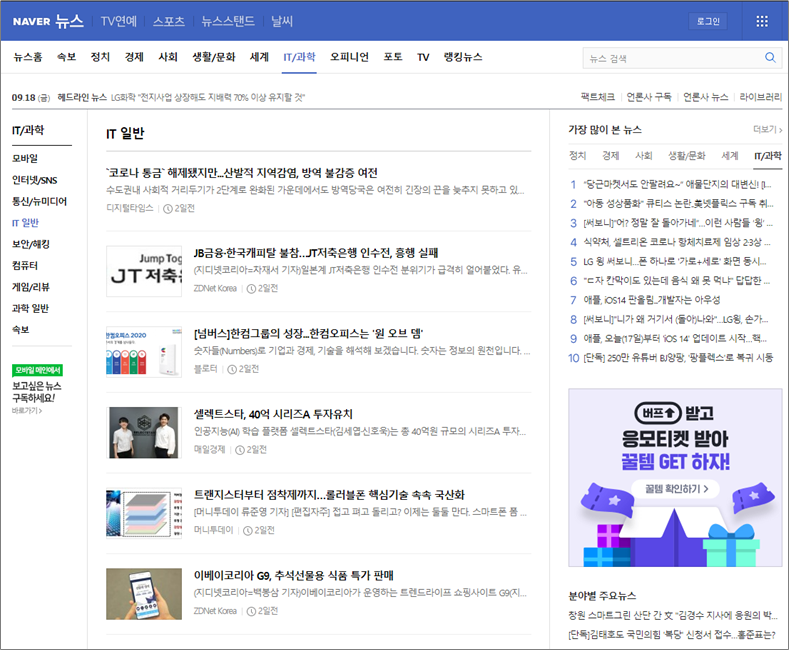

**예제: 뉴스 문서의 본문 페이지**

* 뉴스 본문에 대한 HTML 태그 구성 확인
  * 제목 파트: `tts_head` 클래스의 태그 내용
  * 본문 파트: `_article_body_contents` 클래스의 태그 내용

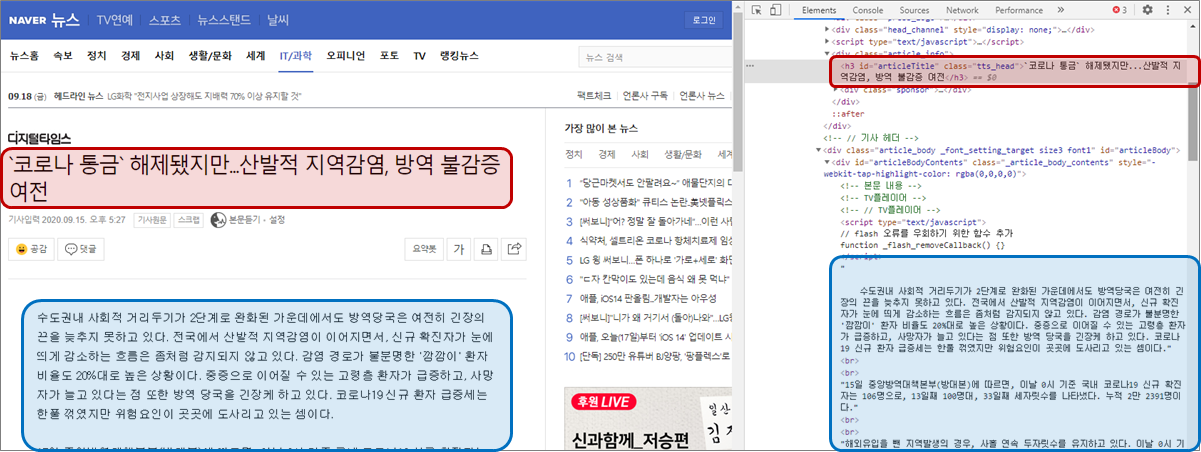

## (2) [Python] 뉴스 문서 크롤링



* 현재 출력된 뉴스 목록 HTML 태그  각 뉴스 고유id 파싱
* 뉴스 페이지의 HTML 태그  제목, 본문, 댓글 파트 추출
* 크롤링된 문서 저장 (경로: “~/[뉴스 분야]/[news OR comment]_[작성일]_[뉴스id].txt“)

#### **Step 01: 뉴스 페이지 접근, HTML 파서 로드**
  * 뉴스 문서 예제
    * "코로나 통금 해제됐지만...산발적 지역감염, 방역 불감증 여전", 디지털타임스, 2020.09.15.
    * https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=230&oid=029&aid=0002624548

In [24]:
import requests
from bs4 import BeautifulSoup

# 뉴스 페이지 요청
response = requests.get('https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=230&oid=029&aid=0002624548')

# HTML 파서 로드
bs = BeautifulSoup(response.text, 'html.parser')

  * Response 503 - Service Unavailable 문제해결
    * 헤드리스 웹브라우저 형태로 접근하여 대상 페이지 읽기를 시도할 수 있음

In [25]:
print(response.text)

<HTML><HEAD>
<TITLE>Service Unavailable</TITLE>
</HEAD><BODY>
<H1>Service Unavailable - Zero size object</H1>
The server is temporarily unable to service your request.  Please try again
later.<P>
Reference&#32;&#35;15&#46;8e6adc17&#46;1632830098&#46;5160bcc7
</BODY></HTML>



In [26]:
# 뉴스 페이지 요청
from urllib.request import urlopen, Request
req = Request('https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=230&oid=029&aid=0002624548')
req.add_header('user-agent', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36')
client = urlopen(req)
page = client.read()
client.close()

print(page[:1024])

# HTML 파서 로드
bs = BeautifulSoup(page, 'html.parser')

b'<!DOCTYPE HTML> \r\n<html lang="ko"> \r\n<head>\r\n<meta charset="euc-kr">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="referrer" contents="always">\r\n<meta name="viewport" content="width=1106" />\r\n<title>`\xc4\xda\xb7\xce\xb3\xaa \xc5\xeb\xb1\xdd` \xc7\xd8\xc1\xa6\xb5\xc6\xc1\xf6\xb8\xb8...\xbb\xea\xb9\xdf\xc0\xfb \xc1\xf6\xbf\xaa\xb0\xa8\xbf\xb0, \xb9\xe6\xbf\xaa \xba\xd2\xb0\xa8\xc1\xf5 \xbf\xa9\xc0\xfc : \xb3\xd7\xc0\xcc\xb9\xf6 \xb4\xba\xbd\xba</title>\r\n\n\n\t\n\t\n\t\t\n\t\n\n\n\t\n\t\t\n\t\t\n\t\t\n\t\n\t\n\t\n\n<meta property="me2:post_tag"\t\tcontent="\xb5\xf0\xc1\xf6\xc5\xd0\xc5\xb8\xc0\xd3\xbd\xba : \xb3\xd7\xc0\xcc\xb9\xf6\xb4\xba\xbd\xba"/>\n<meta property="me2:category1"\t\tcontent="\xb5\xf0\xc1\xf6\xc5\xd0\xc5\xb8\xc0\xd3\xbd\xba"/>\n<meta property="me2:category2"\t\tcontent="IT/\xb0\xfa\xc7\xd0"/>\n<meta property="me2:image"\t\t\tcontent=""/>\n\n<meta property="og:title"\t\t\tcontent="`\xc4\xda\xb7\xce\xb3\xaa \xc5\xeb\xb1\xdd` \xc7\xd8

#### **Step 02: 뉴스 본문영역 추출**

In [27]:
# 방법 1:
# 본문 클래스를 포함한 단일 태그를 select
body = bs.select_one('div._article_body_contents')

print(body)

<div class="_article_body_contents" id="articleBodyContents">
<!-- 본문 내용 -->
<!-- TV플레이어 -->
<!-- // TV플레이어 -->
<script type="text/javascript">
// flash 오류를 우회하기 위한 함수 추가
function _flash_removeCallback() {}
</script>
	
	수도권내 사회적 거리두기가 2단계로 완화된 가운데에서도 방역당국은 여전히 긴장의 끈을 늦추지 못하고 있다. 전국에서 산발적 지역감염이 이어지면서, 신규 확진자가 눈에 띄게 감소하는 흐름은 좀처럼 감지되지 않고 있다. 감염 경로가 불분명한 '깜깜이' 환자 비율도 20%대로 높은 상황이다. 중증으로 이어질 수 있는 고령층 환자가 급증하고, 사망자가 늘고 있다는 점 또한 방역 당국을 긴장케 하고 있다. 코로나19 신규 환자 급증세는 한풀 꺾였지만 위험요인이 곳곳에 도사리고 있는 셈이다.<br/><br/>15일 중앙방역대책본부(방대본)에 따르면, 이날 0시 기준 국내 코로나19 신규 확진자는 106명으로, 13일째 100명대, 33일째 세자릿수를 나타냈다. 누적 2만 2391명이다.<br/><br/>해외유입을 뺀 지역발생의 경우, 사흘 연속 두자릿수를 유지하고 있다. 이날 0시 기준 지역발생 환자는 91명으로 전날 보다 7명 줄었으며, 수도권에서 71명(서울 32명, 경기 31명, 인천 8명)이 발생하는 등 여전히 수도권 중심으로 확진자가 나오고 있다.<br/><br/>이러한 가운데 전국적으로 산발적 지역감염이 이어졌다. 17개 시도 중 13개 시도에서 확진자가 발생했다. 부산에서 4명이나 나왔고, 충남·제주에서도 각각 3명씩 확인됐다. <br/><br/>위중증 환자는 1명 늘어 158명이 됐고, 사망자는 4명이나 늘어 누적 367명이 됐다. 치명률 1.64%다.<br/><br/>특히 확진 시에 중증으로 이어질 가능성이 높은 위험군인 60세 이상 고령층이 위중증환자의 86.7%(1

In [28]:
# 방법 2:
# 본문 id를 포함한 단일 태그를 select
body2 = bs.select_one('div#articleBodyContents')

print(body2)

<div class="_article_body_contents" id="articleBodyContents">
<!-- 본문 내용 -->
<!-- TV플레이어 -->
<!-- // TV플레이어 -->
<script type="text/javascript">
// flash 오류를 우회하기 위한 함수 추가
function _flash_removeCallback() {}
</script>
	
	수도권내 사회적 거리두기가 2단계로 완화된 가운데에서도 방역당국은 여전히 긴장의 끈을 늦추지 못하고 있다. 전국에서 산발적 지역감염이 이어지면서, 신규 확진자가 눈에 띄게 감소하는 흐름은 좀처럼 감지되지 않고 있다. 감염 경로가 불분명한 '깜깜이' 환자 비율도 20%대로 높은 상황이다. 중증으로 이어질 수 있는 고령층 환자가 급증하고, 사망자가 늘고 있다는 점 또한 방역 당국을 긴장케 하고 있다. 코로나19 신규 환자 급증세는 한풀 꺾였지만 위험요인이 곳곳에 도사리고 있는 셈이다.<br/><br/>15일 중앙방역대책본부(방대본)에 따르면, 이날 0시 기준 국내 코로나19 신규 확진자는 106명으로, 13일째 100명대, 33일째 세자릿수를 나타냈다. 누적 2만 2391명이다.<br/><br/>해외유입을 뺀 지역발생의 경우, 사흘 연속 두자릿수를 유지하고 있다. 이날 0시 기준 지역발생 환자는 91명으로 전날 보다 7명 줄었으며, 수도권에서 71명(서울 32명, 경기 31명, 인천 8명)이 발생하는 등 여전히 수도권 중심으로 확진자가 나오고 있다.<br/><br/>이러한 가운데 전국적으로 산발적 지역감염이 이어졌다. 17개 시도 중 13개 시도에서 확진자가 발생했다. 부산에서 4명이나 나왔고, 충남·제주에서도 각각 3명씩 확인됐다. <br/><br/>위중증 환자는 1명 늘어 158명이 됐고, 사망자는 4명이나 늘어 누적 367명이 됐다. 치명률 1.64%다.<br/><br/>특히 확진 시에 중증으로 이어질 가능성이 높은 위험군인 60세 이상 고령층이 위중증환자의 86.7%(1

#### **Step 03: 후처리 단계(불필요한 영역 삭제)**

* 불필요한 HTML 태그 형태는 제거하여 plain text만 수집
  * BeautifulSoup에서 text를 얻어오면, 기본적으로 HTML 태그를 제외하고 텍스트만 반환
  * `strip()` 함수를 사용하여 문자열의 전후 공백을 제거
* 추출결과에서 `script` 코드는 삭제 필요
  * BeautifulSoup의 `descompose()` 함수를 사용하면 특정 태그를 삭제 가능
    * 함수 적용 시, BeautifulSoup 파서에게 주어진 HTML elelment tree에서 해당 태그를 완전히 삭제
    * 같은 문서에 2번 이상 실행하면, `None` 객체를 `decompose` 할 수 없다고 오류 발생
    * `copy` 패키지를 이용하여 대상 태그를 복제한 후 처리해야 안전함

In [29]:
# 불필요한 script 태그를 삭제하지 않은 경우
print('========== 공백 삭제 전 ==========')
content = body.text
print(content)

print('========== 공백 삭제 후 ==========')
content = content.strip()
print(content)

========== 공백 삭제 전 ==========





// flash 오류를 우회하기 위한 함수 추가
function _flash_removeCallback() {}

	
	수도권내 사회적 거리두기가 2단계로 완화된 가운데에서도 방역당국은 여전히 긴장의 끈을 늦추지 못하고 있다. 전국에서 산발적 지역감염이 이어지면서, 신규 확진자가 눈에 띄게 감소하는 흐름은 좀처럼 감지되지 않고 있다. 감염 경로가 불분명한 '깜깜이' 환자 비율도 20%대로 높은 상황이다. 중증으로 이어질 수 있는 고령층 환자가 급증하고, 사망자가 늘고 있다는 점 또한 방역 당국을 긴장케 하고 있다. 코로나19 신규 환자 급증세는 한풀 꺾였지만 위험요인이 곳곳에 도사리고 있는 셈이다.15일 중앙방역대책본부(방대본)에 따르면, 이날 0시 기준 국내 코로나19 신규 확진자는 106명으로, 13일째 100명대, 33일째 세자릿수를 나타냈다. 누적 2만 2391명이다.해외유입을 뺀 지역발생의 경우, 사흘 연속 두자릿수를 유지하고 있다. 이날 0시 기준 지역발생 환자는 91명으로 전날 보다 7명 줄었으며, 수도권에서 71명(서울 32명, 경기 31명, 인천 8명)이 발생하는 등 여전히 수도권 중심으로 확진자가 나오고 있다.이러한 가운데 전국적으로 산발적 지역감염이 이어졌다. 17개 시도 중 13개 시도에서 확진자가 발생했다. 부산에서 4명이나 나왔고, 충남·제주에서도 각각 3명씩 확인됐다. 위중증 환자는 1명 늘어 158명이 됐고, 사망자는 4명이나 늘어 누적 367명이 됐다. 치명률 1.64%다.특히 확진 시에 중증으로 이어질 가능성이 높은 위험군인 60세 이상 고령층이 위중증환자의 86.7%(137명)을 차지하는 상황이다. 사망자 역시 60세 이상이 344명 93.7%를 차지하고 있다. 이러한 가운데 일부 사업장에서는 여전히 방역 불감증이 나타나고 있다. 일부 음식점에서는 거리두기 지침을 이행하지 않고 모든 테이블에 손님을 앉히는 모습이 목격되고 있다. 또한 일부 의료기관, 운동 시설 등에

In [30]:
# 대상 태그를 복제
import copy
tempBody = copy.copy(body)

# decompose 함수를 적용하여 "script" 파트를 삭제
tempBody.script.decompose()

# 결과 출력
content = tempBody.text.strip()
print(content)

수도권내 사회적 거리두기가 2단계로 완화된 가운데에서도 방역당국은 여전히 긴장의 끈을 늦추지 못하고 있다. 전국에서 산발적 지역감염이 이어지면서, 신규 확진자가 눈에 띄게 감소하는 흐름은 좀처럼 감지되지 않고 있다. 감염 경로가 불분명한 '깜깜이' 환자 비율도 20%대로 높은 상황이다. 중증으로 이어질 수 있는 고령층 환자가 급증하고, 사망자가 늘고 있다는 점 또한 방역 당국을 긴장케 하고 있다. 코로나19 신규 환자 급증세는 한풀 꺾였지만 위험요인이 곳곳에 도사리고 있는 셈이다.15일 중앙방역대책본부(방대본)에 따르면, 이날 0시 기준 국내 코로나19 신규 확진자는 106명으로, 13일째 100명대, 33일째 세자릿수를 나타냈다. 누적 2만 2391명이다.해외유입을 뺀 지역발생의 경우, 사흘 연속 두자릿수를 유지하고 있다. 이날 0시 기준 지역발생 환자는 91명으로 전날 보다 7명 줄었으며, 수도권에서 71명(서울 32명, 경기 31명, 인천 8명)이 발생하는 등 여전히 수도권 중심으로 확진자가 나오고 있다.이러한 가운데 전국적으로 산발적 지역감염이 이어졌다. 17개 시도 중 13개 시도에서 확진자가 발생했다. 부산에서 4명이나 나왔고, 충남·제주에서도 각각 3명씩 확인됐다. 위중증 환자는 1명 늘어 158명이 됐고, 사망자는 4명이나 늘어 누적 367명이 됐다. 치명률 1.64%다.특히 확진 시에 중증으로 이어질 가능성이 높은 위험군인 60세 이상 고령층이 위중증환자의 86.7%(137명)을 차지하는 상황이다. 사망자 역시 60세 이상이 344명 93.7%를 차지하고 있다. 이러한 가운데 일부 사업장에서는 여전히 방역 불감증이 나타나고 있다. 일부 음식점에서는 거리두기 지침을 이행하지 않고 모든 테이블에 손님을 앉히는 모습이 목격되고 있다. 또한 일부 의료기관, 운동 시설 등에서 방역 수칙을 준수하지 않고 있다는 내용의 신고도 이어지고 있다.이에 서울시에서는 서울 전역 10인 이상 집회금지, 한강공원 일부 통제 조치 등을 유지하기로 한 상태다.권준욱 방대본

### 실습: 뉴스 크롤러 기능 구현 (단일 뉴스 처리)
* 입력: 뉴스 문서 URL
* 출력: 뉴스의 정보(제목, 본문, 작성일)가 저장된 dictionary 객체

In [31]:
import requests
import copy
from bs4 import BeautifulSoup

from urllib.request import urlopen, Request

def getParsedObjectWithout503(url):
  # 뉴스 페이지 요청

  req = Request(url)
  req.add_header('user-agent', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36')
  client = urlopen(req)
  page = client.read()
  client.close()

  bs = BeautifulSoup(page, 'html.parser')

  return bs

def parseNews(url):
  # 뉴스 페이지 요청
  #response = requests.get(url)
  bs = getParsedObjectWithout503(url)

  ##########
  # TODO: 본문 추출
  ##########
  body = bs.select_one('div#articleBodyContents')
  body.script.decompose()
  content = body.text.strip()

  ##########
  # TODO: 제목 추출
  ##########
  title = bs.select_one('h3#articleTitle').text.strip()


  ##########
  # TODO: 작성일 추출
  ##########
  written_date = bs.select_one('span.t11').text.strip()


  # 결과 구조체 저장
  result = {
      'written_date': written_date,
      'title': title,
      'content': content,
  }

  return result

parseNews('https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=230&oid=029&aid=0002624548')

{'content': '수도권내 사회적 거리두기가 2단계로 완화된 가운데에서도 방역당국은 여전히 긴장의 끈을 늦추지 못하고 있다. 전국에서 산발적 지역감염이 이어지면서, 신규 확진자가 눈에 띄게 감소하는 흐름은 좀처럼 감지되지 않고 있다. 감염 경로가 불분명한 \'깜깜이\' 환자 비율도 20%대로 높은 상황이다. 중증으로 이어질 수 있는 고령층 환자가 급증하고, 사망자가 늘고 있다는 점 또한 방역 당국을 긴장케 하고 있다. 코로나19 신규 환자 급증세는 한풀 꺾였지만 위험요인이 곳곳에 도사리고 있는 셈이다.15일 중앙방역대책본부(방대본)에 따르면, 이날 0시 기준 국내 코로나19 신규 확진자는 106명으로, 13일째 100명대, 33일째 세자릿수를 나타냈다. 누적 2만 2391명이다.해외유입을 뺀 지역발생의 경우, 사흘 연속 두자릿수를 유지하고 있다. 이날 0시 기준 지역발생 환자는 91명으로 전날 보다 7명 줄었으며, 수도권에서 71명(서울 32명, 경기 31명, 인천 8명)이 발생하는 등 여전히 수도권 중심으로 확진자가 나오고 있다.이러한 가운데 전국적으로 산발적 지역감염이 이어졌다. 17개 시도 중 13개 시도에서 확진자가 발생했다. 부산에서 4명이나 나왔고, 충남·제주에서도 각각 3명씩 확인됐다. 위중증 환자는 1명 늘어 158명이 됐고, 사망자는 4명이나 늘어 누적 367명이 됐다. 치명률 1.64%다.특히 확진 시에 중증으로 이어질 가능성이 높은 위험군인 60세 이상 고령층이 위중증환자의 86.7%(137명)을 차지하는 상황이다. 사망자 역시 60세 이상이 344명 93.7%를 차지하고 있다. 이러한 가운데 일부 사업장에서는 여전히 방역 불감증이 나타나고 있다. 일부 음식점에서는 거리두기 지침을 이행하지 않고 모든 테이블에 손님을 앉히는 모습이 목격되고 있다. 또한 일부 의료기관, 운동 시설 등에서 방역 수칙을 준수하지 않고 있다는 내용의 신고도 이어지고 있다.이에 서울시에서는 서울 전역 10인 이상 집회금지, 한강공원 일부 통제 조치 등을 유지하기

**실습결과 실행 테스트**

In [32]:
t1 = parseNews('https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=230&oid=029&aid=0002624548')
t2 = parseNews('https://news.naver.com/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=032&aid=0003033063&date=20200917&type=1&rankingSeq=9&rankingSectionId=101')

print(t1)
print(t2)

{'written_date': '2020.09.15. 오후 5:27', 'title': '`코로나 통금` 해제됐지만...산발적 지역감염, 방역 불감증 여전', 'content': '수도권내 사회적 거리두기가 2단계로 완화된 가운데에서도 방역당국은 여전히 긴장의 끈을 늦추지 못하고 있다. 전국에서 산발적 지역감염이 이어지면서, 신규 확진자가 눈에 띄게 감소하는 흐름은 좀처럼 감지되지 않고 있다. 감염 경로가 불분명한 \'깜깜이\' 환자 비율도 20%대로 높은 상황이다. 중증으로 이어질 수 있는 고령층 환자가 급증하고, 사망자가 늘고 있다는 점 또한 방역 당국을 긴장케 하고 있다. 코로나19 신규 환자 급증세는 한풀 꺾였지만 위험요인이 곳곳에 도사리고 있는 셈이다.15일 중앙방역대책본부(방대본)에 따르면, 이날 0시 기준 국내 코로나19 신규 확진자는 106명으로, 13일째 100명대, 33일째 세자릿수를 나타냈다. 누적 2만 2391명이다.해외유입을 뺀 지역발생의 경우, 사흘 연속 두자릿수를 유지하고 있다. 이날 0시 기준 지역발생 환자는 91명으로 전날 보다 7명 줄었으며, 수도권에서 71명(서울 32명, 경기 31명, 인천 8명)이 발생하는 등 여전히 수도권 중심으로 확진자가 나오고 있다.이러한 가운데 전국적으로 산발적 지역감염이 이어졌다. 17개 시도 중 13개 시도에서 확진자가 발생했다. 부산에서 4명이나 나왔고, 충남·제주에서도 각각 3명씩 확인됐다. 위중증 환자는 1명 늘어 158명이 됐고, 사망자는 4명이나 늘어 누적 367명이 됐다. 치명률 1.64%다.특히 확진 시에 중증으로 이어질 가능성이 높은 위험군인 60세 이상 고령층이 위중증환자의 86.7%(137명)을 차지하는 상황이다. 사망자 역시 60세 이상이 344명 93.7%를 차지하고 있다. 이러한 가운데 일부 사업장에서는 여전히 방역 불감증이 나타나고 있다. 일부 음식점에서는 거리두기 지침을 이행하지 않고 모든 테이블에 손님을 앉히는 모습이 목격되고 있다. 또한 일부 의료기관, 운동 시설 등

# Part 2: 위키피디아 문서


## (1) 위키피디아 문서구조 파악

**예제: 한국어 위키피디아, "코로나바이러스감염증-19" 페이지**  

* 위키피디아 URL 구성
  * 문서 제목을 URL 마지막으로 사용하여 페이지 탐색 가능함
  * e.g.)
    * 한국어 페이지: https://ko.wikipedia.org/wiki/코로나바이러스감염증-19
    * 영어 페이지: https://en.wikipedia.org/wiki/Coronavirus_disease_2019
* 문서 구성
  * 제목: `firstHeading` 클래스의 태그 내용
  * 목차: `toc` 클래스의 태그 내용
  * 인포박스: `infobox` 클래스의 태그 내용

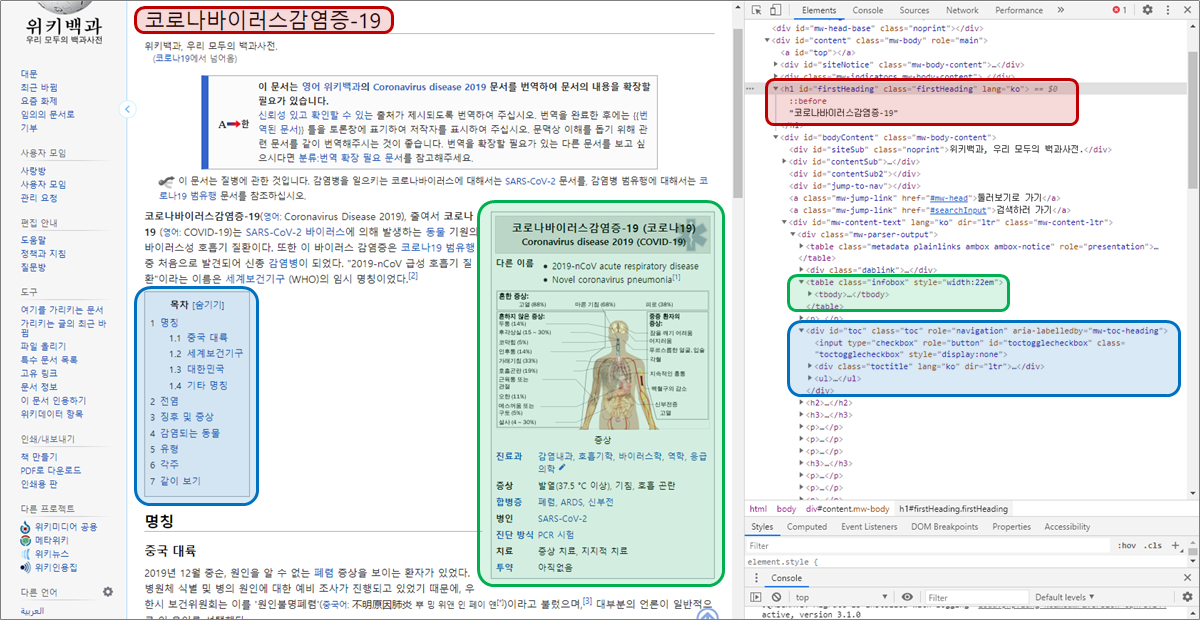

## (2) [Python] 위키피디아 크롤링

* 문서 내 info-box 영역 확인 및 추출  불필요한 HTML태그 등 후처리 작업
* 크롤링된 문서 저장 (경로: “~/infobox/[위키문서id].txt“,  원본경로: “~/dump/[위키문서id].html“)
* 문서 본문의 HTML 태그(href)  현재 문서와 연결된 링크 추출  방문기록(history) 확인 후, 신규 링크이면 크롤링 진행예정 목록으로 추가
* 위키피디아 라이브러리 활용 (wikipedia)

#### **Step 01: 위키피디아 페이지 접근, HTML 파서 로드**


In [33]:
import requests
from bs4 import BeautifulSoup

# 위키 페이지 요청 (한국어 등 유니코드 문자는 percentage-encoding 처리)
# response = requests.get('https://ko.wikipedia.org/wiki/%EC%BD%94%EB%A1%9C%EB%82%98%EB%B0%94%EC%9D%B4%EB%9F%AC%EC%8A%A4%EA%B0%90%EC%97%BC%EC%A6%9D-19')
response = requests.get('https://ko.wikipedia.org/wiki/코로나바이러스감염증-19')

# HTML 파서 로드
bs = BeautifulSoup(response.text, 'html.parser')

#### **Step 02: 목차 영역 추출**

In [34]:
# ToC 클래스를 포함한 단일 태그를 select
toc = bs.select_one('div.toc')

print(toc.text)

목차

1 명칭

1.1 중국 대륙
1.2 세계보건기구
1.3 대한민국
1.4 기타 명칭


2 전염
3 징후 및 증상

3.1 장기 후유증


4 변이 바이러스
5 예방

5.1 백신
5.2 자가 격리
5.3 사회적 거리두기


6 감염되는 동물
7 사망한 사람
8 영향
9 같이 보기
10 각주




#### **Step 03: 인포박스 영역 추출**

* 테이블 구성
* 단순히 HTML 태그만 삭제하면 내용 파악이 어려움
* 행 단위로 속성값을 구분하여 처리해야 유용함

In [35]:
# infobox 클래스를 포함한 단일 태그를 select
body = bs.select_one('table.infobox')

print(body)

<table class="infobox" style="width:22em"><tbody><tr><th colspan="2" style="text-align:center;font-size:125%;font-weight:bold;background:#ccc"><div style="background:gainsboro; position:relative; width:100%; height:50px; display:table;"><div style="position:absolute; bottom:0px; right:0;"><img alt="Entete médecine.png" data-file-height="192" data-file-width="198" decoding="async" height="50" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/51/Entete_m%C3%A9decine.png/52px-Entete_m%C3%A9decine.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/51/Entete_m%C3%A9decine.png/77px-Entete_m%C3%A9decine.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/51/Entete_m%C3%A9decine.png/103px-Entete_m%C3%A9decine.png 2x" width="52"/></div><span style="position:relative; width:100%; display:table-cell; vertical-align:middle; text-align:center; padding:4px;">코로나바이러스감염증-19<br/>(코로나19)</span></div></th></tr><tr><th scope="row">다른 이름</th><td>Coronavirus disease 2019 (COVID-19)</td

In [36]:
# 단순히 태그만 삭제한 경우
print(body.text)

코로나바이러스감염증-19(코로나19)다른 이름Coronavirus disease 2019 (COVID-19)코로나바이러스감염증-19에 감염된 환자의 폐 엑스레이 사진. 폐렴으로 인한 출혈과 염증으로 폐 곳곳에 하얀 부분이 보인다.진료과감염내과증상발열, 권태감, 기침, 호흡곤란 및 폐렴 등 다양한 호흡기감염증 및 가래, 인후통, 두통, 객혈과 오심, 설사 등기간잠복기: 1~14일(평균 4~7일)유형호흡기 증후군·감염증병인SARS-CoV-2 및 그 변이위험 인자고령·면역기능 저하·기저질환진단 방식중합효소 연쇄 반응(PCR) 검사유사 질병
중증급성호흡기증후군(SARS)
중동호흡기증후군(MERS)
예방
백신 접종
올바른 손씻기
마스크 착용하기
기침 예절 준수
씻지 않은 손으로 눈·코·입 만지지 않기
주위 환경을 자주 소독하고 환기하기
치료대체 치료투약수액, 해열제


In [37]:
# infobox의 행 단위 결과
for row in body.select('tr'):
  print(row)

<tr><th colspan="2" style="text-align:center;font-size:125%;font-weight:bold;background:#ccc"><div style="background:gainsboro; position:relative; width:100%; height:50px; display:table;"><div style="position:absolute; bottom:0px; right:0;"><img alt="Entete médecine.png" data-file-height="192" data-file-width="198" decoding="async" height="50" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/51/Entete_m%C3%A9decine.png/52px-Entete_m%C3%A9decine.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/51/Entete_m%C3%A9decine.png/77px-Entete_m%C3%A9decine.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/51/Entete_m%C3%A9decine.png/103px-Entete_m%C3%A9decine.png 2x" width="52"/></div><span style="position:relative; width:100%; display:table-cell; vertical-align:middle; text-align:center; padding:4px;">코로나바이러스감염증-19<br/>(코로나19)</span></div></th></tr>
<tr><th scope="row">다른 이름</th><td>Coronavirus disease 2019 (COVID-19)</td></tr>
<tr><td colspan="2" style="text-align:cen

In [38]:
# infobox의 행 단위 추출결과
for row in body.select('tr'):
  # 결과값이 없는 경우를 고려하여 plain text 발췌
  head = row.select_one('th')
  if head is None:
    head = ''
  else:
    head = head.text

  # 속성값 부분
  value = row.select_one('td')
  if value is None:
    value = ''
  else:
    value = value.text

  # 결과 출력
  print(head + "    " + value)

코로나바이러스감염증-19(코로나19)    
다른 이름    Coronavirus disease 2019 (COVID-19)
    
    코로나바이러스감염증-19에 감염된 환자의 폐 엑스레이 사진. 폐렴으로 인한 출혈과 염증으로 폐 곳곳에 하얀 부분이 보인다.
진료과    감염내과
증상    발열, 권태감, 기침, 호흡곤란 및 폐렴 등 다양한 호흡기감염증 및 가래, 인후통, 두통, 객혈과 오심, 설사 등
기간    잠복기: 1~14일(평균 4~7일)
유형    호흡기 증후군·감염증
병인    SARS-CoV-2 및 그 변이
위험 인자    고령·면역기능 저하·기저질환
진단 방식    중합효소 연쇄 반응(PCR) 검사
유사 질병    
중증급성호흡기증후군(SARS)
중동호흡기증후군(MERS)

예방    
백신 접종
올바른 손씻기
마스크 착용하기
기침 예절 준수
씻지 않은 손으로 눈·코·입 만지지 않기
주위 환경을 자주 소독하고 환기하기

치료    대체 치료
투약    수액, 해열제


### 실습: 위키피디아 크롤러 기능 구현 (단일 문서 처리)
* 입력: 위키피디아 문서 URL
* 출력: 문서 내 정보(제목, 목차, 본문, 인포박스)가 저장된 dictionary 객체

In [40]:
import requests
import copy
from bs4 import BeautifulSoup

def parseWiki(url):
  # 위키 페이지 요청
  response = requests.get(url)

  # HTML 파서 로드
  bs = BeautifulSoup(response.text, 'html.parser')

 
  ##########
  # TODO: 제목 추출
  ##########
  title = bs.select_one('h1.firstHeading').text.strip()

  ##########
  # TODO: 목차 추출
  ##########
  toc = bs.select_one('div.toc').text.strip()


  ##########
  # TODO: 인포박스 추출
  ##########
  infobox = bs.select_one('table.infobox').text.strip()


  ##########
  # TODO: 본문 추출 
  #      (단, 목차와 인포박스 영역은 별도로 추출하므로 제외할 것)
  #      (e.g., decompose() 함수 등의 수단을 활용함)
  ##########
  body = bs.select_one('div#bodyContent')
  for div in body.find_all("div", {'class':'toc'}): 
    div.decompose()
  for div in body.find_all("table", {'class':'infobox'}): 
    div.decompose()
  #print(body)
  content = body.text.strip()


  # 결과 구조체 저장
  result = {
      'title': title,
      'toc': toc,
      'infobox': infobox,
      'content': content,
  }

  return result

result = parseWiki('https://ko.wikipedia.org/wiki/코로나바이러스감염증-19')  

printResult(result)

title= 코로나바이러스감염증-19
toc= 목차

1 명칭

1.1 중국 대륙
1.2 세계보건기구
1...
infobox= 코로나바이러스감염증-19(코로나19)다른 이름Coronavirus disease 2019 (COVID-19)코로나바이러스감염증-19에 감염된 환자의 폐 엑스레이 사진. 폐렴으로 인한 출혈과 염증으로 폐 곳곳에 하얀 부분이 보인다....
content= 이 글은  2021년 11월 9일 (화) 17:59까지 신규 사용자나 비등록 사용자의 편집이 제한되어 있습니다.  더 자세한 설명은 보호 정책과 보호 기록을 살펴보세요. 이 글을 고칠 수 없다면, 토론 문서에 의견을 남기거나, 준보호 편집 요청을 남기거나, 보호 해제 요청을 남겨주세요. 로그인을 하거나 계정을 만들면 직접 고칠 수도 있습니다.
이 문서는 영어 위키백과의 Coronavirus disease 2019 문서를 번역하여 문서의 내용을 확장할 필요...
----------


**실습결과 실행 테스트**

In [41]:
t1 = parseWiki('https://ko.wikipedia.org/wiki/코로나바이러스감염증-19')
t2 = parseWiki('https://ko.wikipedia.org/wiki/세계보건기구')

def printResult(obj):
  print('title= ' + obj['title'])
  print('toc= ' + obj['toc'][:32] + '...')
  print('infobox= ' + obj['infobox'][:128] + '...')
  print('content= ' + obj['content'][:256] + '...')
  print('----------')

printResult(t1)
printResult(t2)

title= 코로나바이러스감염증-19
toc= 목차

1 명칭

1.1 중국 대륙
1.2 세계보건기구
1...
infobox= 코로나바이러스감염증-19(코로나19)다른 이름Coronavirus disease 2019 (COVID-19)코로나바이러스감염증-19에 감염된 환자의 폐 엑스레이 사진. 폐렴으로 인한 출혈과 염증으로 폐 곳곳에 하얀 부분이 보인다....
content= 이 글은  2021년 11월 9일 (화) 17:59까지 신규 사용자나 비등록 사용자의 편집이 제한되어 있습니다.  더 자세한 설명은 보호 정책과 보호 기록을 살펴보세요. 이 글을 고칠 수 없다면, 토론 문서에 의견을 남기거나, 준보호 편집 요청을 남기거나, 보호 해제 요청을 남겨주세요. 로그인을 하거나 계정을 만들면 직접 고칠 수도 있습니다.
이 문서는 영어 위키백과의 Coronavirus disease 2019 문서를 번역하여 문서의 내용을 확장할 필요...
----------
title= 세계보건기구
toc= 목차

1 역사
2 목적 및 역할
3 구조

3.1 회원국...
infobox= 세계보건기구世界保健機構


World Health Organization


기





 조직형태  

전문 기구


 수장  

사무총장 테워드로스 아드하놈 거브러이여수스


 설립  

1948년 4월 7일


 본부위치  ...
content= WHO는 여기로 연결됩니다. 다른 뜻에 대해서는 Who 문서를 참고하십시오.

세계보건기구(世界保健機構, 영어: World Health Organization, WHO)는 국제 공중보건을 책임지는 유엔 전문 기구이다.[1] 2020년 기준으로 194개 회원국이 WHO에 가맹되었으며, 그 목적은 세계 인류가 가능한 한 최고의 건강 수준에 도달하는 것이다.[2]


역사[편집]
WHO의 설립은 1946년에 허가되었으며 1948년 4월 7일에 정식으로 발족하였...
----------
